# Proyek Machine Learning Terapan Pertama - Lalu Habib Satya Wiguna

In [1]:
from google.colab import drive
drive.mount('/content/drive')
# Link drive = https://drive.google.com/drive/folders/1VJF9TWOpA3LlgVbAiGiXAoBgpumKN3xx?usp=sharing

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# import library yang akan digunakan

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

warnings.filterwarnings('ignore')
%matplotlib inline

## Domain Knowledge
Pada tahap pertama ini, kita akan melihat isi dari dataset yang akan kita gunakan serta memahami setiap atribut yang ada pada dataset tersebut.
Dataset yang akan digunakan yaitu [Churn for Bank Customers](https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers)

In [3]:
# Loading dataset

data = pd.read_csv('/content/drive/MyDrive/dicoding-submission-dataset/bank-churn.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Dari output di atas, kita mempunyai 10.000 data dengan 14 kolom pada Churn for Bank Customers dataset. Berdasarkan informasi dari Kaggle, variabel-variabel pada Churn for Bank Customers dataset adalah sebagai berikut:
- RowNumber: nomor urut dari setiap kolom pada dataset.
- CustomerId: nomor ID dari customer.
- Surname: nama belakang atau nama keluarga dari customer.
- CreditScore: angka statistik yang mengevaluasi kelayakan kredit konsumen dan didasarkan pada riwayat kredit.
- Geography: negara asal dari customer.
- Gender: jenis kelamin dari customer.
- Age: usia dari customer.
- Tenure: mengacu pada jumlah tahun seorang customer telah menjadi nasabah bank.
- Balance: sisa uang di rekening bank customer.
- NumOfProducts: jumlah produk yang telah dibeli oleh customer melalui bank.
- HasCrCard: menunjukkan apakah customer memiliki kartu kredit atau tidak.
- IsActiveMember: menunjukkan apakah customer masih aktif atau tidak di bank.
- EstimatedSalary: gaji perorangan rata-rata.
- Exited: menunjukkan apakah nasabah meninggalkan bank atau tidak.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Dari output di atas dapat dilihat bahwa:
- Terdapat 3 kolom dengan tipe object, yaitu: Surname, Geography, Gender.
- Terdapat 9 kolom numerik dengan tipe int64, yaitu: RowNumber, CustomerId, CreditScore, Age, Tenure, NumOfProducts, HasCrCard, IsActiveMember, dan Exited.
- Terdapat 2 kolom numerik dengan tipe float64, yaitu: Balance dan EstimatedSalary.

In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:

- Count adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom.
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval - dalam empat bagian sebaran yang sama.
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

Dari output di atas kita tidak melihat informasi statistik untuk kolom Geography dan Gender. Hal tersebut terjadi karena data pada kedua kolom tersebut masih bernilai String sedangkan fungsi describe hanya dapat memproses data yang bernilai integer. Oleh karena itu kita perlu melakukan encoding terhadap kedua kolom tersebut.

In [6]:
# Melakukan encoding terhadap kolom Geography dan Gender

data['Geography'] = LabelEncoder().fit_transform(data['Geography'])
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

In [7]:
# Menampilkan kembali fungsi Describe

data.describe()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
# Melihat apa saja kolom kategorikal & numerik berdasarkan data unik pada kolom

for x in list(data):
    print(f"{x} = {data[x].nunique()}")

RowNumber = 10000
CustomerId = 10000
Surname = 2932
CreditScore = 460
Geography = 3
Gender = 2
Age = 70
Tenure = 11
Balance = 6382
NumOfProducts = 4
HasCrCard = 2
IsActiveMember = 2
EstimatedSalary = 9999
Exited = 2


Berdasarkan output di atas, dapat kita kelompokkan kolom kategorikal dan numerik berdasarkan keunikan data pada kolomnya sebagai berikut.  
Kolom kategorikal:  
- Geography
- Gender
- HasCrCard
- IsActiveMember
- Exited

Kolom numerik:  
- CreditScore
- Age
- Tenure
- Balance
- NumOfProducts
- EstimatedSalary

Kemudian ada beberapa kolom yang akan dibuang pada proses data cleaning yaitu RowNumber, CustomerId, dan Surname.

## Data Cleaning
Pada tahap ini, kita akan melakukan pembersihan pada data yaitu dengan menghapus kolom yang tidak diperlukan, menghapus data duplikat (jika ada), melihat data yang bernilai kosong, dan menangani data outliers.

### Delete Unused Columns
Pada tahap ini kita perlu untuk menghapus kolom yang tidak memiliki pengaruh di dalam dataset kita. RowNumber, CustomerId, dan Surname merupakan kolom yang tidak memiliki pengaruh tertentu dalam proses klasifikasi nanti karena kita tentu tidak memerlukan nomor kolom, nomor ID, serta nama belakang dari customer untuk menentukan apakah seseorang akan berhenti menjadi nasabah di bank.

In [9]:
# Menghapus kolom yang tidak memiliki efek pada output nanti

data = data.drop(["RowNumber","CustomerId","Surname"], axis=1)

In [10]:
list(data)

# Sukses menghapus kolom RowNumber, CustomerId, Surname

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [11]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


### Handling Duplicated Data
Pada tahap ini kita akan memeriksa apakah ada data duplikat pada dataset yang kita gunakan. Jika ada maka kita perlu untuk menghapusnya agar tidak boros informasi serta mengurangi kemungkinan overfitting.

In [12]:
data.duplicated().sum()

# Tidak ada data duplikat, jadi aman

0

### Handling Missing Value
Pada tahap ini kita perlu memastikan apakah ada nilai yang bernilai kosong pada dataset kita karena akan memiliki pengaruh pada proses klasifikasi nanti jika data kita memiliki informasi yang kurang.

In [13]:
# Melihat apakah ada data yang bernilai kosong

data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Dari output di atas kita dapat melihat bahwa seluruh kolom pada dataset kita tidak memiliki nilai kosong atau null value.

## Exploratory Data Analysis
Exploratory Data Analysis atau sering disingkat EDA merupakan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data.
Di tahap ini kita akan melakukan EDA dengan menggunakan metode bersifat univariate (melibatkan satu variate atau variabel) dan multivariate (melibatkan dua atau lebih variabel).  
Pertama , kita bagi fitur pada dataset menjadi dua bagian, yaitu numerical features dan categorical features.

In [14]:
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

### Univariate Analysis


#### Categorical Features
Lakukan analisis pada categorical features dulu

   jumlah sampel  persentase
0           5014        50.1
1           2509        25.1
2           2477        24.8


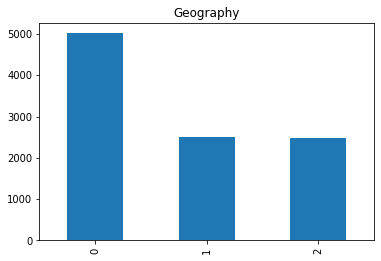

In [15]:
feature = categorical_features[0]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
1           5457        54.6
0           4543        45.4


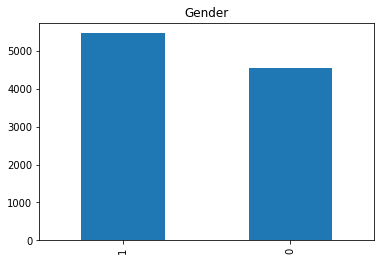

In [16]:
feature = categorical_features[1]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
1           7055        70.6
0           2945        29.4


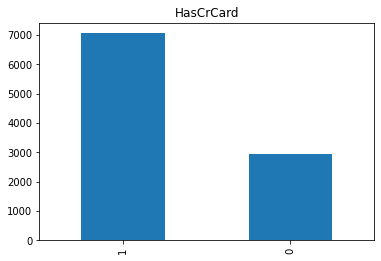

In [17]:
feature = categorical_features[2]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
1           5151        51.5
0           4849        48.5


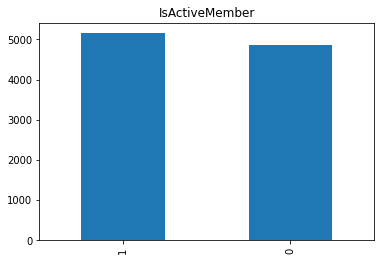

In [18]:
feature = categorical_features[3]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
0           7963        79.6
1           2037        20.4


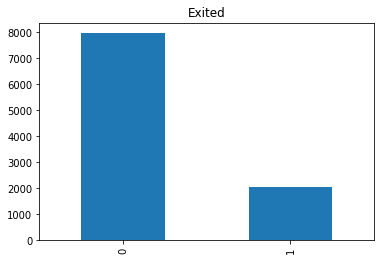

In [19]:
feature = categorical_features[4]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan visualisasi data kategorikal di atas didapatkan kesimpulan sebagai berikut:  
1. Hampir 50% customer berasal dari France, dan sisanya terbagi atas Spanyol dan Germany dengan komposisi yang hampir sama.
2. Customer dengan jenis kelamin laki-laki lebih banyak dibandingkan dengan perempuan.
3. Sebanyak +- 70% customer itu memiliki credit card.
4. Customer terbagi hampir sama untuk tingkat keaktifan, yaitu +-48% tidak aktif dan 52% customer aktif.
5. Sekitar 20% dari customer memilih untuk meninggalkan bank.

#### Numerical Features
Selanjutnya, untuk fitur numerik, kita akan melihat histogram dari masing-masing fiturnya.

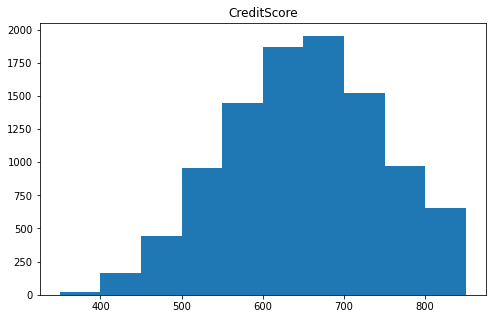

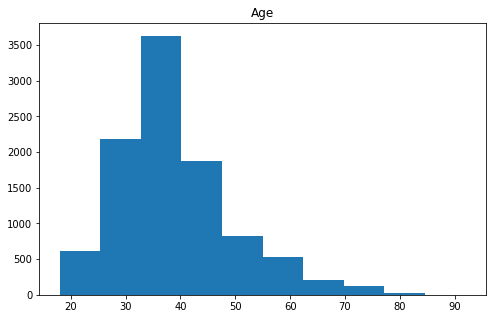

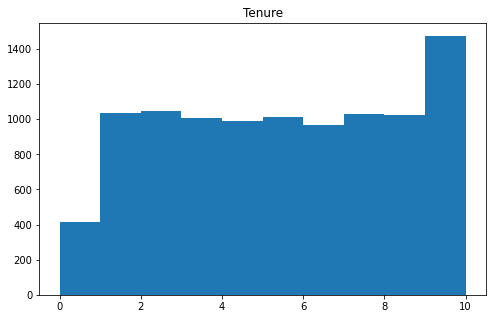

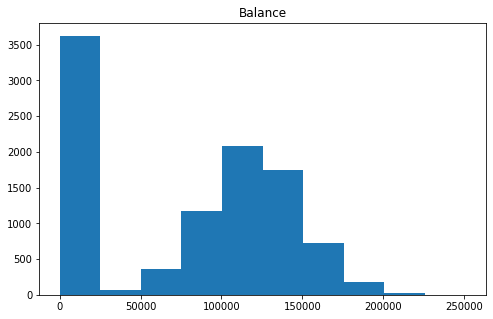

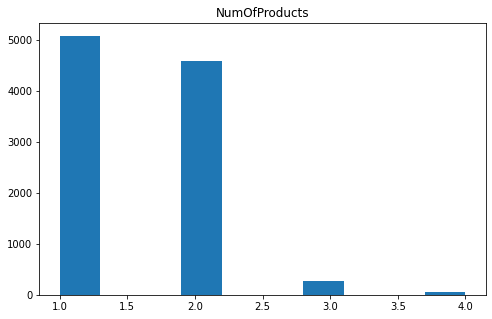

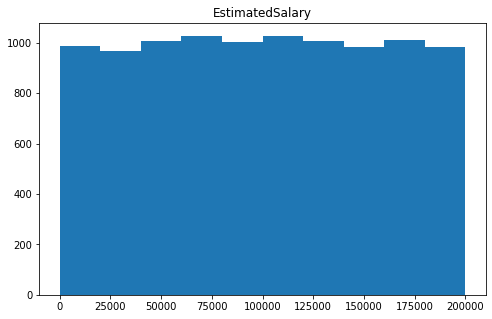

In [20]:
for x in numerical_features:
    plt.figure(figsize=(8, 5))
    plt.title(x)
    plt.hist(data[x])
    plt.show()

Berdasarkan visualisasi data numerik di atas didapatkan kesimpulan sebagai berikut:  
1. Secara umum, customer memiliki CreditScore normal / umumnya di 500-800
2. Customer memiliki persebaran usia paling tinggi pada umur 30-40 tahun
3. Tenure secara umum tersebar secara merata kecuali di rentang 0-1 yang rendah dan 9-10 yang tinggi
4. Balance customer secara umum terbagi menjadi dua bagian utama, yaitu tinggi pada balance 0 dan normally distributed di 50.000 sd 200.000
5. Untuk NumOfProducts 50% 1 produk, 45% 2 produk, 3% 3 produk dan 2% 4 produk
6. EstimatedSalary memiliki distribusi data yang seragam.

### Multivariate Analysis
Multivariate EDA menunjukkan hubungan antara dua atau lebih variabel pada data. Multivariate EDA yang menunjukkan hubungan antara dua variabel biasa disebut sebagai bivariate EDA. Selanjutnya, kita akan melakukan analisis data pada fitur kategori dan numerik.

#### Categorical Features

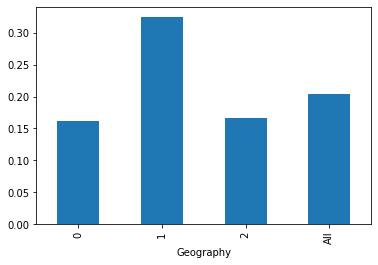

In [21]:
pivot = pd.crosstab(data["Geography"], data["Exited"], margins=True)
ratio = pivot[1] / pivot["All"]
ratio.plot.bar()

Note:  
0 = France  
1 = Germany  
2 = Spain  

Berdasarkan output di atas, dapat diambil kesimpulan sebagai berikut:  
1. Customer dari France lebih sedikit yang meninggalkan bank.
2. Spanyol memiliki lebih sedikit customer yang meninggalkan bank. 
3. Lebih banyak customer yang meninggalkan bank di region Germany dengan rasio lebih dari 30%.

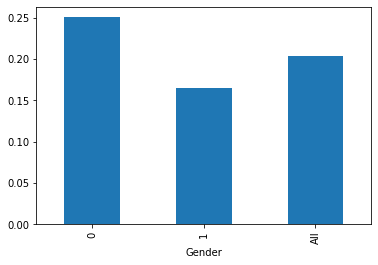

In [22]:
pivot = pd.crosstab(data["Gender"], data["Exited"], margins=True)
ratio = pivot[1] / pivot["All"]
ratio.plot.bar()

Note:  
0 = Perempuan (female)  
1 = Laki-laki (male)

Berdasarkan output di atas, lebih banyak customer perempuan yang meninggalkan bank.

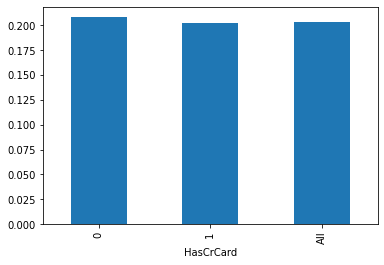

In [23]:
pivot = pd.crosstab(data["HasCrCard"], data["Exited"], margins=True)
ratio = pivot[1] / pivot["All"]
ratio.plot.bar()

Note:  
0 = Tidak mempunyai credit card  
1 = Mempunyai credit card

Dari output diatas dapat dilihat bahwa customer yang memiliki credit card maupun tidak memiliki credit card persentasenya tidak terlalu signifikan yang berarti pengaruh kepemilikan credit card tidak berpengaruh besar pada customer untuk meninggalkan bank.

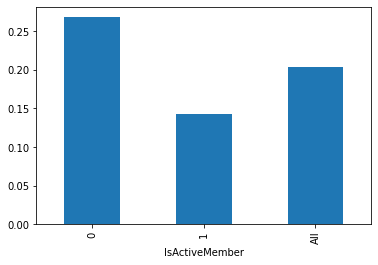

In [24]:
pivot = pd.crosstab(data["IsActiveMember"], data["Exited"], margins=True)
ratio = pivot[1] / pivot["All"]
ratio.plot.bar()

Note:  
0 = Tidak aktif  
1 = Aktif

Dari output di atas kita lihat bahwa lebih banyak customer tidak aktif yang meninggalkan bank daripada customer yang aktif dan perbandingannya signifikan yang berarti bahwa status keaktifan customer memiliki pengaruh terhadap customer untuk meninggalkan bank.

#### Numerical Features

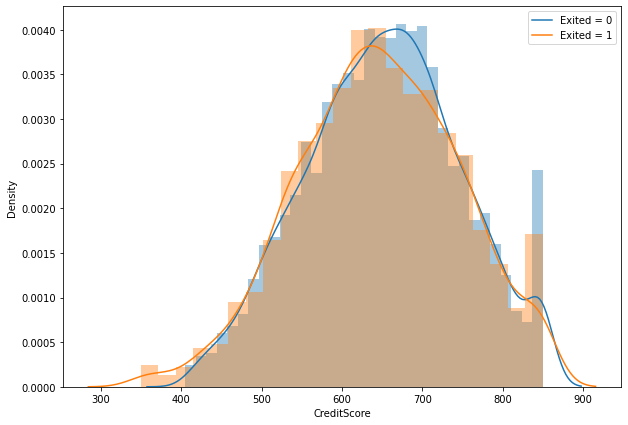

In [25]:
plt.figure(figsize=(10, 7))
sns.distplot(data["CreditScore"][data["Exited"] == 0])
sns.distplot(data["CreditScore"][data["Exited"] == 1])
plt.legend(["Exited = 0", "Exited = 1"])
plt.show()

Dari grafik di atas dapat dilihat bahwa distribusi customer yang meninggalkan bank berdasarkan credit score-nya tidak jauh berbeda (overlapping) satu sama lain, density customer yang pergi dan yang bertahan hampir sama sehingga dapat disimpulkan bahwa credit score tidak mempengaruhi customer untuk pergi meninggalkan bank.

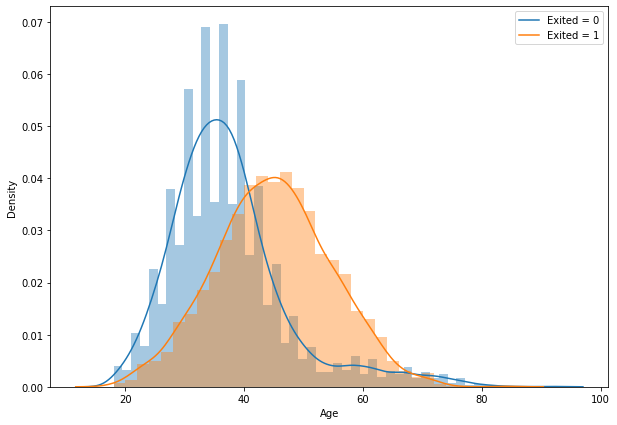

In [26]:
plt.figure(figsize=(10, 7))
sns.distplot(data["Age"][data["Exited"] == 0])
sns.distplot(data["Age"][data["Exited"] == 1])
plt.legend(["Exited = 0", "Exited = 1"])
plt.show()

Berdasarkan grafik di atas, customer yang bertahan di bank lebih banyak pada kelompok usia 20-45 tahun, sedangkan yang meninggalkan bank lebih banyak pada kelompok usia 30-60 tahun yang artinya kebanyakan customer dengan usia relatif muda memilih untuk bertahan di bank dan kebanyakan customer dengan usia relatif tua meninggalkan bank.

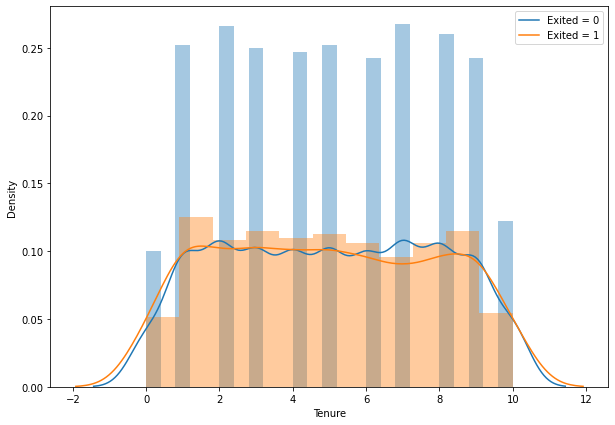

In [27]:
plt.figure(figsize=(10, 7))
sns.distplot(data["Tenure"][data["Exited"] == 0])
sns.distplot(data["Tenure"][data["Exited"] == 1])
plt.legend(["Exited = 0", "Exited = 1"])
plt.show()

Dari grafik di atas dapat diambil kesimpulan bahwa tidak ada insight khusus antara lama customer menjadi nasabah di bank dengan keluarnya customer bank.

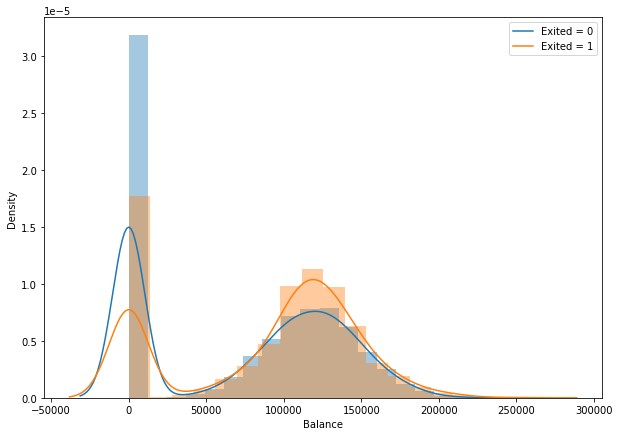

In [28]:
plt.figure(figsize=(10, 7))
sns.distplot(data["Balance"][data["Exited"] == 0])
sns.distplot(data["Balance"][data["Exited"] == 1])
plt.legend(["Exited = 0", "Exited = 1"])
plt.show()

Dari grafik di atas dapat diambil kesimpulan bahwa tidak ada insight khusus antara sisa tabungan di bank dengan keluarnya customer bank.

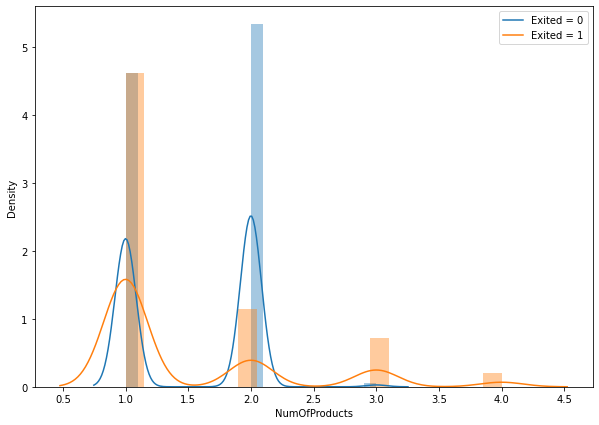

In [29]:
plt.figure(figsize=(10, 7))
sns.distplot(data["NumOfProducts"][data["Exited"] == 0])
sns.distplot(data["NumOfProducts"][data["Exited"] == 1])
plt.legend(["Exited = 0", "Exited = 1"])
plt.show()

Dari grafik di atas dapat diambil kesimpulan bahwa tidak ada insight khusus antara produk yang dibeli melalui bank dengan keluarnya customer bank.

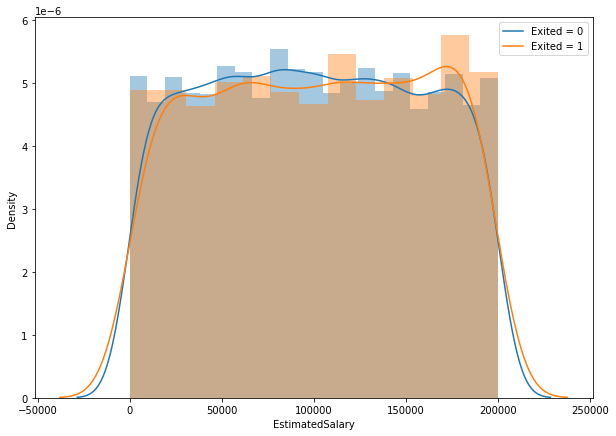

In [30]:
plt.figure(figsize=(10, 7))
sns.distplot(data["EstimatedSalary"][data["Exited"] == 0])
sns.distplot(data["EstimatedSalary"][data["Exited"] == 1])
plt.legend(["Exited = 0", "Exited = 1"])
plt.show()

Dari grafik di atas dapat diambil kesimpulan bahwa tidak ada insight khusus antara gaji customer dengan keluarnya customer bank.

#### Correlation Matrix

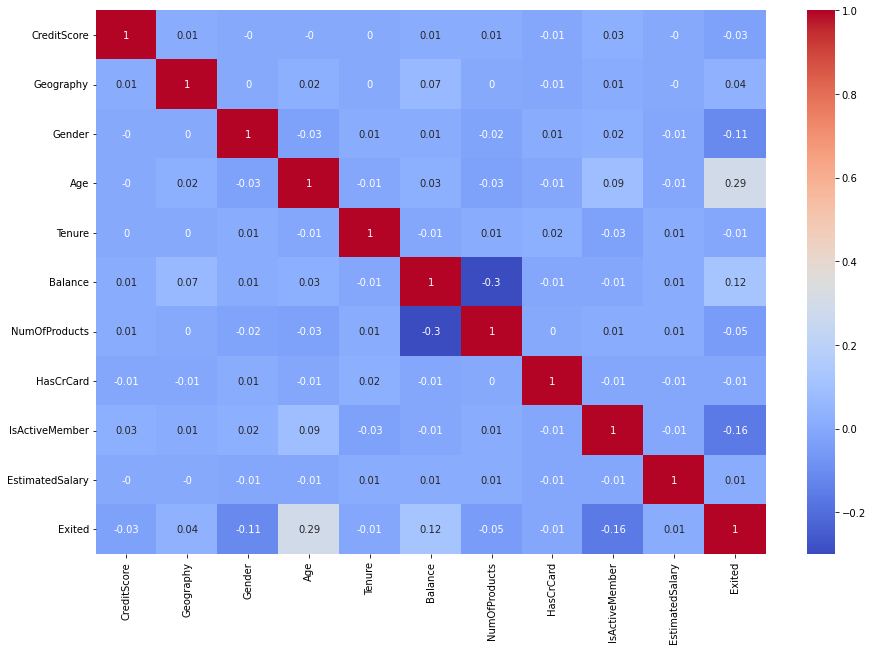

In [31]:
plt.figure(figsize=(15, 10))
correlation_matrix = data.corr().round(2)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

Note:  
- Jika korelasi (x,y) diantara -0.1 sd 0.1 maka disebut sebagai korelasi yang buruk (bad correlation)
- Jika korelasi (x,y) diantara 0.1 sd 0.5 maka disebut sebagai korelasi yang baik (good correlation)
- Jika korelasi (x,y) diantara -0.1 sd -0.5 disebut sebagai korelasi yang baik (good correlation)
- Jika korelasi (x,y) > 0.5 maka disebut sebagai korelasi yang sangat baik (very good correlation)
- Jika korelasi (x,y) < -0.5 maka disebut sebagai korelasi yang sangat baik (very good correlation)

Berdasarkan correlation matrix di atas didapatkan kesimpulan hubungan antara setiap variabel dengan fitur target kita yaitu Exited sebagai berikut:  
1. Bad correlation: CreditScore, Geography, Tenure, NumOfProducts, HasCrCard, EstimatedSalary   
2. Good correlation: Gender, Age, Balance, IsActiveMember

Kemudian untuk fitur yang memiliki korelasi yang buruk dapat di-drop.

In [32]:
data.drop(['CreditScore', 'Geography', 'Tenure', 'NumOfProducts', 'HasCrCard', 'EstimatedSalary'], inplace=True, axis=1)

In [33]:
data.head()

,Gender,Age,Balance,IsActiveMember,Exited
0,0,42,0.00,1,1
1,0,41,83807.86,1,0
2,0,42,159660.80,0,1
3,0,39,0.00,0,0
4,0,43,125510.82,1,0


## Data Preparation
Pada tahap ini kita akan melakukan persiapan pada dataset kita agar lebih mudah pada tahap pemodelan nanti.

### Train-Test-Split
Kita akan menggunakan train_test_split dari library Scikitlearn untuk melakukan pembagian data latih dan data uji dengan perbandingan sebanyak 80% dari total dataset sebagai data latih dan 20% sebagai data uji.

In [34]:
X = data.drop(['Exited'], axis=1)
y = data['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [35]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 10000
Total # of sample in train dataset: 8000
Total # of sample in test dataset: 2000


### Standarization
Standardisasi adalah teknik transformasi yang paling umum digunakan dalam tahap persiapan pemodelan. Kita akan menggunakan teknik StandarScaler dari library Scikitlearn.

StandardScaler melakukan proses standarisasi fitur dengan mengurangkan mean (nilai rata-rata) kemudian membaginya dengan standar deviasi untuk menggeser distribusi. StandardScaler menghasilkan distribusi dengan standar deviasi sama dengan 1 dan mean sama dengan 0. Sekitar 68% dari nilai akan berada di antara -1 dan 1.

Untuk menghindari kebocoran informasi pada data uji, kita hanya akan menerapkan fitur standarisasi pada data latih. Kemudian, pada tahap evaluasi, kita akan melakukan standarisasi pada data uji.

In [36]:
numerical_features = ['Age', 'Balance']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Age,Balance
9216,-0.842293,-1.220873
7324,0.012056,-1.220873
918,-0.367655,-1.220873
5902,0.106983,-1.220873
2807,-0.557510,1.083582


In [37]:
X_train[numerical_features].describe().round(4)

,Age,Balance
count,8000.0000,8000.0000
mean,0.0000,0.0000
std,1.0001,1.0001
min,-1.9814,-1.2209
25%,-0.6524,-1.2209
50%,-0.1778,0.3271
75%,0.4867,0.8194
max,5.0432,2.7824


## Model Development using K-Nearest Neighbor
K-Nearest Neighbor (KNN) adalah algoritma yang relatif sederhana dibandingkan dengan algoritma lain. Algoritma KNN menggunakan 'kesamaan fitur' untuk memprediksi nilai dari setiap data yang baru. Dengan kata lain, setiap data baru diberi nilai berdasarkan seberapa mirip titik tersebut dalam set pelatihan.

KNN bekerja dengan membandingkan jarak satu sampel ke sampel pelatihan lain dengan memilih sejumlah k tetangga terdekat (dengan k adalah sebuah angka positif). Nah, itulah mengapa algoritma ini dinamakan K-nearest neighbor (sejumlah k tetangga terdekat). KNN bisa digunakan untuk kasus klasifikasi dan regresi. Pada kali ini, kita akan menggunakannya untuk kasus klasifikasi.

### Train the Data

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

Kita akan menggunakan parameter default dari model KNN yang kita buat lalu melihat akurasinya dari model tersebut.

In [39]:
y_pred = knn.predict(X_test)

In [40]:
from sklearn import metrics

print(f'Model accuracy : {metrics.accuracy_score(y_test, y_pred)}')

Model accuracy : 0.4515


Akurasi yang didapatkan dari model dengan parameter default adalah 45%, akurasi yang sangat rendah. Oleh karena itu kita perlu melakukan hyperparameter tuning untuk menemukan parameter yang tepat dengan tujuan untuk mendapatkan model dengan akurasi yang lebih baik. 

### Hyperparameter Tuning
Untuk melakukan hyperparameter tuning, kita perlu mengetahui parameter apa saja yang akan kita lakukan tuning di model KNN ini. Hyperparameter yang kita akan lakukan tuning adalah leaf_size, p, dan n_neighbors. Penjelasan untuk tiap parameter yang akan di-tuning sebagai berikut:  
- leaf_size : merupakan ukuran atau size yang mengontrol titik dalam node tertentu.
- p : merupakan power parameter untuk metrik Minkowski. Secara default menggunakan euclidean distance.
- n_neighbors : merupakan jumlah tetangga pada algoritma KNN.

Dalam melakukan hyperparameter tuning kita akan menggunakan GridSearchCV dari library Scikitlearn. Grid search sendiri berfungsi untuk menemukan parameter terbaik dalam model machine learning yang kita gunakan.

In [41]:
from sklearn.model_selection import GridSearchCV

# List Hyperparameter yang akan kita lakukan tuning.
leaf_size = list(range(1, 50))
n_neighbors = list(range(1, 30))
p = [1, 2]

hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
knn_2 = KNeighborsClassifier()
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
best_model = clf.fit(X, y)

# Lihat hyperparameter terbaik untuk model kita
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 29


Setelah dilakukan hyperparameter tuning, didapatkan nilai terbaik untuk parameter yang akan kita gunakan yaitu leaf_size=1, p=1, dan n_neighbors=29. Selanjutnya kita akan mengaplikasian nilai tersebut dan melihat akurasi yang didapatkan setelah melakukan hyperparameter tuning.

In [42]:
knn_tuned = KNeighborsClassifier(leaf_size=1, p=1, n_neighbors=29)
knn_tuned.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=29, p=1)

In [43]:
y_pred = knn_tuned.predict(X_test)

In [44]:
from sklearn import metrics

print(f'Model accuracy : {metrics.accuracy_score(y_test, y_pred)}')

Model accuracy : 0.7625


Ternyata setelah dilakukan hyperparameter tuning akurasi yang sebelumnya 45% sekarang menjadi 76%. Hal tersebut berarti hal baik karena kita telah menemukan parameter yang tepat untuk model yang kita gunakan.

## Model Evaluation
Pada tahap ini kita akan melakukan evaluasi terhadap model yang telah dibuat. Jika prediksi mendekati nilai sebenarnya, performanya baik. Sedangkan jika tidak, performanya buruk. Oleh karena itu kita perlu melakukan evaluasi untuk mengetahui performa dari model yang telah dibuat.

### Precision, Recall, F1-Score, and Accuracy
Kita akan mengukur performa dari model yang telah dibuat dengan melihat persentase dari precision, recall, f1-score, dan accuracy dengan menggunakan fungsi classification_report dari library Scikitlearn. Penjelasan mengenai precision, recall, f1-score, dan accuracy sebagai berikut:  
- precision : merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan hasil yang diprediksi positif.
- recall : merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif.
- f1-score : f1-score merupakan perbandingan rata-rata precision dan recall yang dibobotkan.
- accuracy : merupakan rasio prediksi Benar (positif dan negatif) dengan keseluruhan data.

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1586
           1       0.40      0.29      0.34       414

    accuracy                           0.76      2000
   macro avg       0.61      0.59      0.60      2000
weighted avg       0.74      0.76      0.75      2000



Dari output classification report di atas kita dapat melihat performa dari model kita yaitu 0.76 yang berarti dari 2000 data test yang kita punya ada sekitar 76% data yang diklasifikasikan dengan benar sesuai dengan classnya.

### Confusion Matrix
Kemudian dilanjutkan dengan melihat performa berdasarkan confusion matrix. Pada dasarnya confusion matrix memberikan informasi perbandingan hasil klasifikasi yang dilakukan oleh sistem (model) dengan hasil klasifikasi sebenarnya.  
Terdapat 4 istilah sebagai representasi hasil proses klasifikasi pada confusion matrix. Keempat istilah tersebut adalah True Positive (TP), True Negative (TN), False Positive (FP) dan False Negative (FN) dengan masing-masing penjelasannya sebagai berikut:  
- True Positive (TP): Merupakan data positif yang diprediksi benar.
- True Negative (TN): Merupakan data negatif yang diprediksi benar.
- False Positive (FP): Merupakan data negatif namun diprediksi sebagai data positif.
- False Negative (FN): Merupakan data positif namun diprediksi sebagai data negatif.

Untuk menampilkan confusion matrix, kita akan menggunakan fungsi confusion_matrix dari library Scikitlearn.

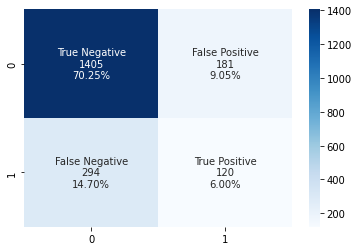

In [46]:
cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

Berdasarkan confusion matrix di atas dapat disimpulkan dari 2000 data yang kita gunakan sebagai data uji, sebanyak 76,25% atau 1525 diprediksi benar (True Negative dan True Positive) oleh model, serta 23.5% atau 475 data salah diprediksi oleh model (False Positive dan False Negative). 